In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Sleep Time v/s Time In Bed

In [2]:
df_raw = pd.read_csv("../data/sleepDay_merged.csv")

In [3]:
df_raw.head()

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,4/12/2016 12:00:00 AM,1,327,346
1,1503960366,4/13/2016 12:00:00 AM,2,384,407
2,1503960366,4/15/2016 12:00:00 AM,1,412,442
3,1503960366,4/16/2016 12:00:00 AM,2,340,367
4,1503960366,4/17/2016 12:00:00 AM,1,700,712


In [5]:
def plot_sleep_time_vs_time_in_bed(df_sleep_data, user_id=None):
    if user_id is None:
        user_id = '1503960366'
    df_sleep_data = df_sleep_data.query("Id == {}".format(user_id))
    df_sleep_data['SleepDate'] = df_sleep_data.apply(lambda x: x['SleepDay'].split(" ")[0], axis=1) 
    df_sleep_data = df_sleep_data.drop(['Id', 'SleepDay', 'TotalSleepRecords'], axis=1)
    ax = plt.subplots(figsize=(12,6))
    ax = sns.barplot(x=df_sleep_data["SleepDate"], y=df_sleep_data["TotalTimeInBed"], color='r' )
    ax = sns.barplot(x=df_sleep_data["SleepDate"], y=df_sleep_data["TotalMinutesAsleep"], color='b')
    ax.set(xlabel="Date", ylabel="Minutes")
    plt.xticks(rotation=90)
    plt.show()
    return df_sleep_data

C:\Users\Harshit Rai\AppData\Local\Temp\ipykernel_18892\2205311882.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sleep_data['SleepDate'] = df_sleep_data.apply(lambda x: x['SleepDay'].split(" ")[0], axis=1)


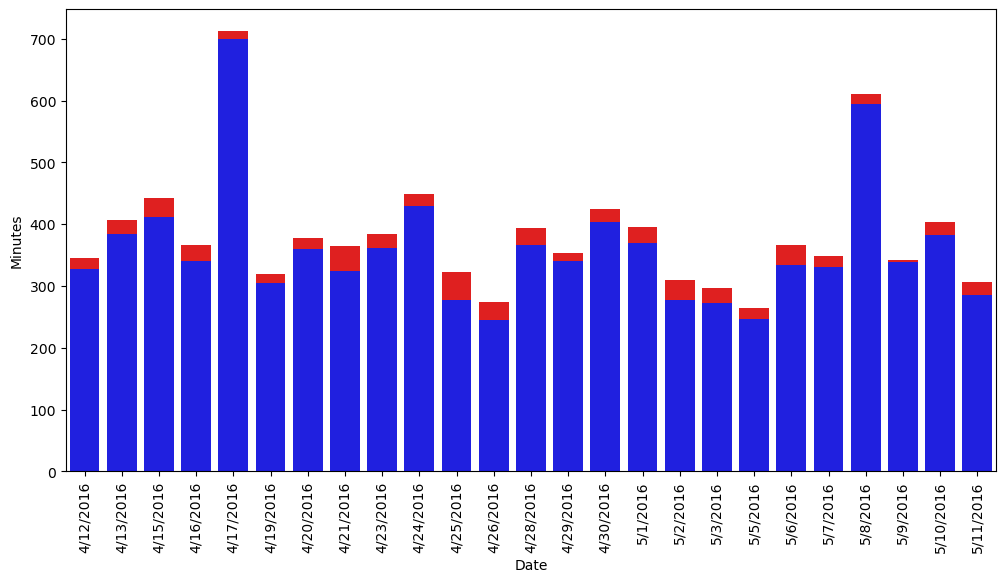

In [6]:
df_sleep_data_proc = plot_sleep_time_vs_time_in_bed(df_raw, '1503960366')

## Daily Steps Pattern

In [7]:
df_daily_steps = pd.read_csv("../data/dailySteps_merged.csv")

In [8]:
df_daily_steps.head()

,Id,ActivityDay,StepTotal
0,1503960366,4/12/2016,13162
1,1503960366,4/13/2016,10735
2,1503960366,4/14/2016,10460
3,1503960366,4/15/2016,9762
4,1503960366,4/16/2016,12669


In [9]:
def plot_daily_step_pattern(df_daily_steps, user_id=None):
    if user_id is None:
        user_id = '1503960366'
    df_daily_steps = df_daily_steps.query("Id == {}".format(user_id))
    df_daily_steps = df_daily_steps.drop(['Id'], axis=1)
    fig, ax1 = plt.subplots(figsize=(12,6))
    sns.barplot(df_daily_steps, x='ActivityDay', y='StepTotal', color='g', ax=ax1)
    plt.xticks(rotation=90)
    plt.show()
    return df_daily_steps

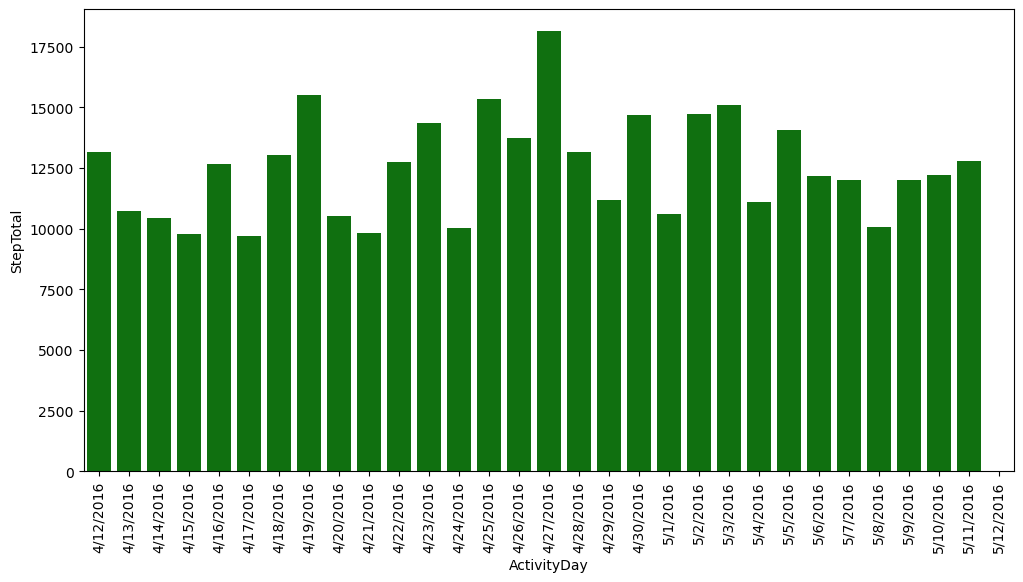

In [10]:
df_daily_steps_proc = plot_daily_step_pattern(df_daily_steps, user_id=None)

## Daily Sleep v/s Step Count Pattern

In [11]:
df_sleep_and_steps = pd.merge(df_daily_steps_proc, df_sleep_data_proc, how='inner', left_on='ActivityDay', right_on='SleepDate')

In [22]:
def plot_daily_sleep_vs_step_count(df_sleep_and_steps):
    fig, ax1 = plt.subplots(figsize=(12,6))
    sns.lineplot(data = df_sleep_and_steps['StepTotal'], marker='o', ax=ax1, color='g')
    plt.xticks(rotation=90)
    ax2 = ax1.twinx()
    sns.barplot(data = df_sleep_and_steps, x='SleepDate', y='TotalMinutesAsleep', alpha=0.4, ax=ax2, color='r')
    ax1.set(xlabel="Date")
    plt.show()

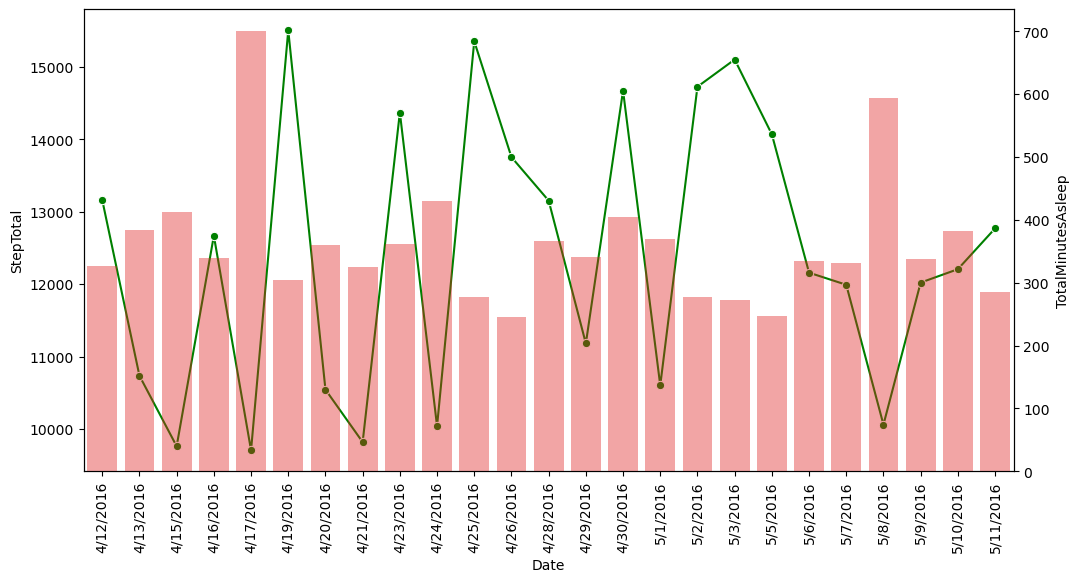

In [23]:
plot_daily_sleep_vs_step_count(df_sleep_and_steps)

## Daily Calorie Pattern

In [24]:
df_daily_calories = pd.read_csv("../data/dailyCalories_merged.csv")

In [25]:
df_daily_calories

,Id,ActivityDay,Calories
0,1503960366,4/12/2016,1985
1,1503960366,4/13/2016,1797
2,1503960366,4/14/2016,1776
3,1503960366,4/15/2016,1745
4,1503960366,4/16/2016,1863
...,...,...,...
935,8877689391,5/8/2016,2847
936,8877689391,5/9/2016,3710
937,8877689391,5/10/2016,2832
938,8877689391,5/11/2016,3832


In [32]:
def plot_daily_calories_pattern(df_daily_calories, user_id=None):
    if user_id is None:
        user_id = '1503960366'
    df_daily_calories = df_daily_calories.query("Id == {}".format(user_id))
    df_daily_calories = df_daily_calories.drop(['Id'], axis=1)
    fig, ax1 = plt.subplots(figsize=(12,6))
    sns.lineplot(data = df_daily_calories, x='ActivityDay', y='Calories', marker='o', ax=ax1, color='g')
    plt.xticks(rotation=90)
    plt.show()
    return df_daily_calories

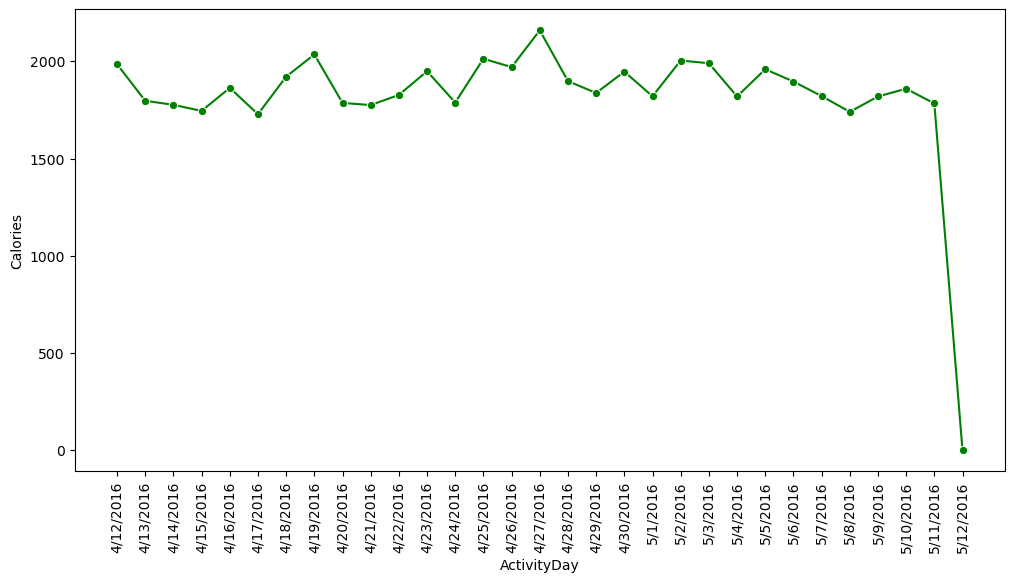

In [34]:
df_daily_calories_proc = plot_daily_calories_pattern(df_daily_calories, user_id=None)